# Juggling Lady

## By Students
### Student 1 : Lior Kricheli ID: 203382494
### Student 2 : Gabi Omer     ID: 204344626
 
 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math
from scipy.spatial import distance

print(cv2.__version__)
plt.rc('image', cmap='gray') # set the default color-map of plt.image() to 'gray'
plt.rc('figure', figsize=[6,6]) # set a bigger default figure size

4.4.0


# methods required:

#### oneCtorVarifier(contour,mask)

##### varifies that theres only 1 contour in the contour list,
#####  if not it erodes the mask.
#####  if true, it dialates the mask.
#####  contour: contour list
#####  mask: mask of a certain ball ######


In [2]:
def oneCtorVarifier(contour,mask):
    
    kernel = np.ones((5,5), np.uint8)
    
    if len(contour) == 1 :
        mask = cv2.dilate(mask, kernel, iterations=1)
        
    elif len(contour) > 1:
        mask = cv2.erode(mask,kernel,iterations=2)

#### eucledeanDistance(X_old, Y_old, X_new, Y_new)

##### return eucledean distance between two points (x1,y1) and (x2,y2)

In [3]:
def eucledeanDistance(X_old, Y_old, X_new, Y_new):
    eDistance = 0
    if (X_old and Y_old) != 0:
         eDistance = math.dist([X_new, Y_new], [X_old, Y_old])
    return eDistance   

#### centerCalc(contour)

##### calculates the center of the contour

##### contour: a contour object not the whole list

In [4]:
def centerCalc(contour):
    
    M = cv2.moments(contour)
    if M["m00"]!= 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        return cX,cY
    else:
        return None

### Source Video

In [5]:
cap = cv2.VideoCapture('P4_juggling.mov')

while True:
    ret, frame = cap.read() # read next frame
    
    if ret==True:
        frame = cv2.resize(frame, (640, 360)) 
        cv2.imshow('WINDOW_NAME', frame)
        
        if (cv2.waitKey(1) & 0xff == 27): # ESC key pressed?
            break
    else:
        break

cap.release() # release input video
cv2.destroyAllWindows() # delete output window
cv2.waitKey(1);

 # find the balls by GaussianBlur and mask

# Blue Ball


Text(0.5, 1.0, 'masking')

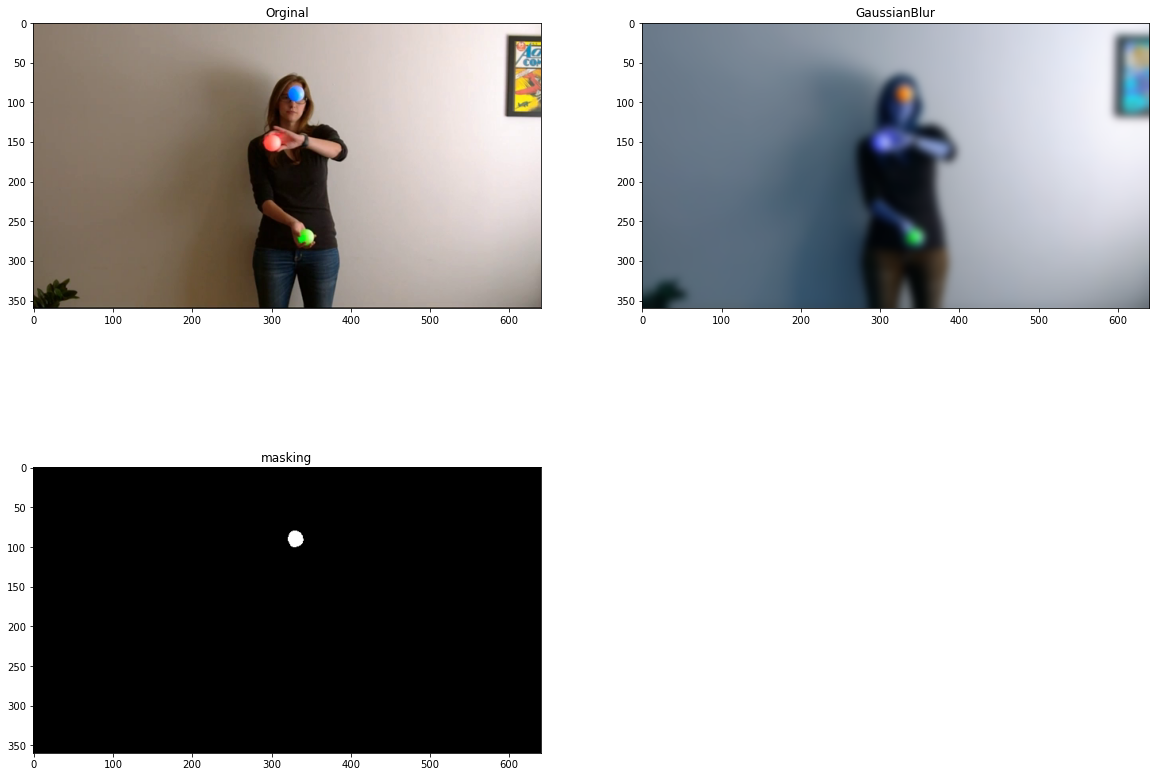

In [6]:
cap = cv2.VideoCapture('P4_juggling.mov')

ret, frame = cap.read() #read first frame

# filter frame with sigma = 5
blur = cv2.GaussianBlur(frame ,(0,0), 5)

#convert to RGB
frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)

#Create Masking
hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)

# thresholds for blue ball
lower = np.array([100,60,110])
upper = np.array([120,255,255])
mask = cv2.inRange(hsv, lower, upper)  

# print plt - orginal, gaussian blur and masking pictures blue ball
plt.figure(figsize=(20,15))

#print by plt
plt.subplot(2,2,1)
plt.imshow(frame)
plt.title("Orginal")

plt.subplot(2,2,2)
plt.imshow(blur)
plt.title("GaussianBlur")

plt.subplot(2,2,3)
plt.imshow(mask)
plt.title("masking")


# Green Ball

In [7]:
cap = cv2.VideoCapture('P4_juggling.mov')

#read first frame
ret, frame = cap.read()

frame = cv2.resize(frame, (640, 360)) 
cv2.imshow('Original',frame)

# filter frame with sigma = 5
blur = cv2.GaussianBlur(frame ,(0,0),5)
cv2.imshow('Blur',blur)

#Create Masking
hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)

# thresholds for green ball
lower = np.array([40,100,100])
upper = np.array([60,255,255])
mask = cv2.inRange(hsv, lower, upper)  

cv2.imshow('Hue mask',mask)

cv2.waitKey(0);
cv2.destroyAllWindows()
cv2.waitKey(1); # waits 1msec

# Red Ball

In [8]:
cap = cv2.VideoCapture('P4_juggling.mov')

#read first frame
ret, frame = cap.read()

frame = cv2.resize(frame, (640, 360)) 
cv2.imshow('Original',frame)

# filter frame with sigma = 5
blur = cv2.GaussianBlur(frame ,(0,0),5)
cv2.imshow('Blur',blur)

#Create Masking
hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)

## thresholds for red ball
lower = np.array([1,100,168])
upper = np.array([5,170,255])
mask = cv2.inRange(hsv, lower, upper) 

cv2.imshow('Hue mask',mask)

cv2.waitKey(0);
cv2.destroyAllWindows()
cv2.waitKey(1); # waits 1msec

# Find the red ball and center 

Text(0.5, 1.0, 'Contour And Center')

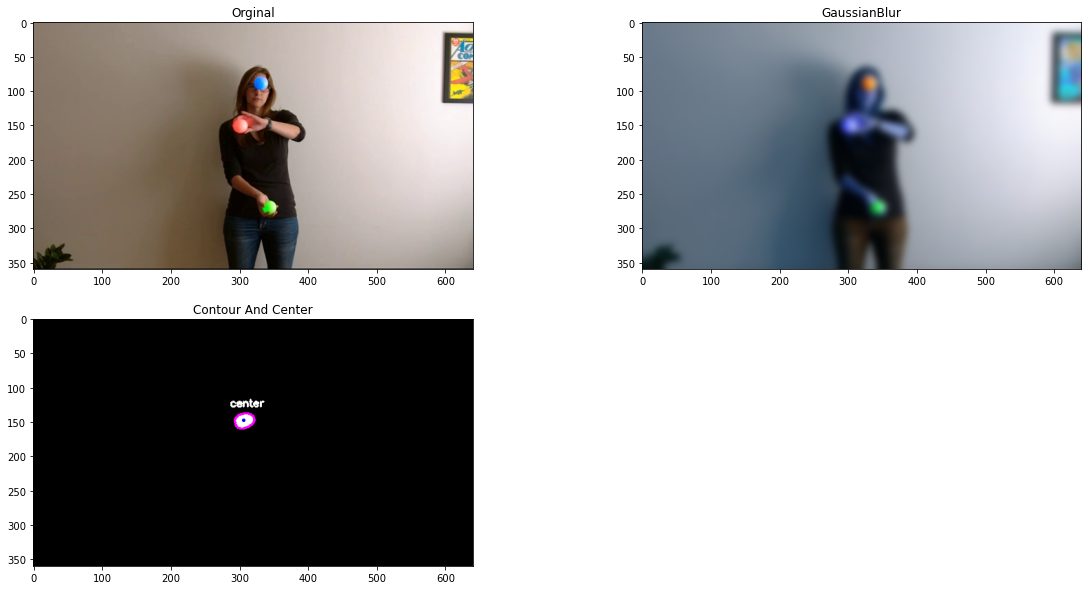

In [9]:
cap = cv2.VideoCapture('P4_juggling.mov')

#read first frame
ret, frame = cap.read()

#kernel
kernel = np.ones((5,5), np.uint8)

frame = cv2.resize(frame, (640, 360)) 

# filter frame with sigma = 5
blur = cv2.GaussianBlur(frame ,(0,0),5)

#Create Masking
hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)

## thresholds for red ball
lower = np.array([1,100,168])
upper = np.array([5,170,255])
mask = cv2.inRange(hsv, lower, upper) 

#convert to rgb
rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)

#list of contours
contours_red, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
ctr_red = contours_red[0]

#calculate center of contour
M_red = cv2.moments(ctr_red)
cX_red = int(M_red["m10"] / M_red["m00"])
cY_red = int(M_red["m01"] / M_red["m00"])

# draw the contour and center of the shape on the image
cv2.drawContours(rgb, contours_red, -1, (255,0 , 255),2)
cv2.circle(rgb, (cX_red, cY_red), 1, (0, 0, 255), 2)
cv2.putText(rgb, "center", (cX_red - 20, cY_red - 20),
 cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

# print by plt
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.imshow(frame)
plt.title("Orginal")

plt.subplot(2,2,2)
plt.imshow(blur)
plt.title("GaussianBlur")

plt.subplot(2,2,3)
plt.imshow(rgb)
plt.title("Contour And Center")

### Calaulator velocity of ball according PPS - Pixel Per Second

Text(0.5, 1.0, 'Masking')

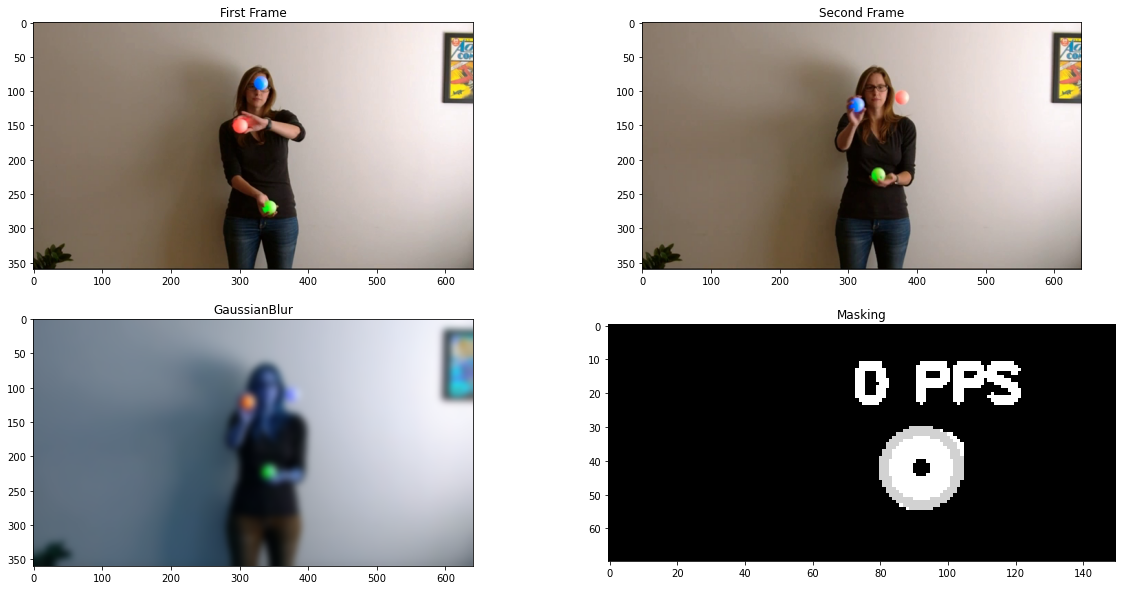

In [10]:
cap = cv2.VideoCapture('P4_juggling.mov')
fps = cap.get(cv2.CAP_PROP_FPS)

#read first frame
ret, F0 = cap.read()

#distance ball between frames 
eDistance = 0

## thresholds for green ball
lower_green = np.array([40,100,100])
upper_green = np.array([60,255,255])

#kernel
kernel = np.ones((5,5), np.uint8)

# initiating coordinates
X_green_old = 0
Y_green_old = 0

#taking other frame
for _ in range(120): 
    ret ,F1 = cap.read()

F1 = cv2.resize(F1, (640, 360)) 

# filter frame with sigma = 5
blur = cv2.GaussianBlur(F1 ,(0,0),5)

#Create Masking
hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)    
mask_green = cv2.inRange(hsv,lower_green,upper_green)

#list of contours
contours_green, _ = cv2.findContours(mask_green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
        
 #make sure that theres only one contour
if len(contours_green) == 1:
    mask_green = cv2.dilate(mask_green, kernel, iterations = 1)            
elif len(contours_green) > 1:          
    mask_green = cv2.erode(mask_green, kernel, iterations = 2)
        
#calculate center
if(centerCalc(contours_green[0]) != None):
    X_green, Y_green = centerCalc(contours_green[0])

#draw center and contuors   
cv2.circle(mask_green, (X_green, Y_green), 1, (0, 0, 0), 2)
cv2.circle(mask_green, (X_green, Y_green), 11, (210, 255, 255), 2)      

        
#difference between two concecutive frames (Position)
if (X_green_old and Y_green_old)!= 0:
    eDistance = math.dist([X_green, Y_green], [X_green_old,Y_green_old])

#calculate velocity PPS - pixel per second
timebetweenframes= 1/fps
velocity = eDistance/timebetweenframes

#save x,y from prev frame
X_green_old = X_green
Y_green_old = Y_green

#print velocity of ball
cv2.putText(mask_green, "{0} PPS".format(math.trunc(velocity)), (X_green - 20, Y_green - 20),
    cv2.FONT_ITALIC, 0.5, (255, 255, 255), 2)

#convert to rgb
F0 = cv2.cvtColor(F0,cv2.COLOR_BGR2RGB)
F1 = cv2.cvtColor(F1,cv2.COLOR_BGR2RGB)

#print by plt
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.imshow(F0)
plt.title("First Frame")

plt.subplot(2,2,2)
plt.imshow(F1)
plt.title("Second Frame")

plt.subplot(2,2,3)
plt.imshow(blur)
plt.title("GaussianBlur")

plt.subplot(2,2,4)
plt.imshow(mask_green[180:250, 250:400])
plt.title("Masking")

# In Video

In [11]:
# thresholds for each ball
lower_green = np.array([40,100,100])
upper_green = np.array([60,255,255])

lower_blue = np.array([100,60,110])
upper_blue = np.array([130,255,255])

lower_red = np.array([1,100,168])
upper_red = np.array([5,170,255])

cap = cv2.VideoCapture('P4_juggling.mov')

while True:
    
    #read first frame
    ret ,frame = cap.read()
    
    if ret == True:
        frame = cv2.resize(frame, (640, 360)) 
        
        # filter frame with sigma = 5
        blur = cv2.GaussianBlur(frame ,(0,0),5)
        
        #Create Masking
        hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)
        mask_green = cv2.inRange(hsv, lower_green, upper_green)
        mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
        mask_red = cv2.inRange(hsv, lower_red, upper_red)
 
        # lets add a contours around our detected balls
        contours_green, _ = cv2.findContours(mask_green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        contours_blue, _ = cv2.findContours(mask_blue, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)               
        contours_red, _ = cv2.findContours(mask_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # draw contuor
        cv2.drawContours(frame, contours_green, -1, (255, 0, 255), 2) 
        cv2.drawContours(frame, contours_blue, -1, (0, 0, 255), 2) 
        cv2.drawContours(frame, contours_red, -1, (0, 255, 255), 2)      
       
        # display frame in a window
        cv2.imshow('find contour',frame) 

        k = cv2.waitKey(1) & 0xff
        if k == 27:
            break
    else:
        break
        
cap.release() # release input video
cv2.destroyAllWindows() # delete output window
cv2.waitKey(1);

# try to track each ball seperetly:

For an estimation of velocity you use v=dx/dt, where dx is the difference in position (it might have 3 components (x,y,z)) and dt is the difference in time (time between the 2 consecutive frames). For acceleration you need 3 frames as a=dv/dt.

### lists and pts and sizeVideo

###### listCenterGreen - append the points of center of ball every frame
###### greenListDist - append the distance of balls every frame
###### sizeVideo - its the size of the frame

In [12]:
listCenterGreen = [0,0]
listCenterBlue = [0,0]
listCenterRed = [0,0]

greenListDist = [0,0,0]
blueListDist = [0,0,0]
redListDist = [0,0,0]

sizeVideo = int(fps)

# Green Ball Track and speed

In [13]:
cap = cv2.VideoCapture('P4_juggling.mov')

#read first frame
ret, F0 = cap.read()

#distance ball between frames 
eDistance = 0

# thresholds for green ball
lower_green = np.array([40,100,100])
upper_green = np.array([60,255,255])

#kernel
kernel = np.ones((5,5), np.uint8)

# initiating coordinates
X_green_old, Y_green_old = 0, 0
         
    
countForCalculateVelocity = 0

while True:
    
    #read second frame
    ret ,F1 = cap.read()
    
    # counter for append the velocity 
    countForCalculateVelocity += 1
    
    if ret == True:
        
        F1 = cv2.resize(F1, (640, 360)) 
        
        # filter frame with sigma = 5
        blur = cv2.GaussianBlur(F1 ,(0,0),5)
        
        #Create Masking
        hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)    
        mask_green = cv2.inRange(hsv,lower_green,upper_green)
     
        #list of contours
        contours_green, _ = cv2.findContours(mask_green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
        
        #make sure that theres only one contour
        if len(contours_green) == 1:
            mask_green = cv2.dilate(mask_green, kernel, iterations = 1)            
        elif len(contours_green) > 1:          
            mask_green = cv2.erode(mask_green, kernel, iterations = 2)
        
        # find center and append to list for velocity
        if(centerCalc(contours_green[0]) != None):
            X_green, Y_green = centerCalc(contours_green[0]) 
            listCenterGreen.append(centerCalc(contours_green[0]))

        # mark the center ball and countor
        cv2.circle(mask_green, (X_green, Y_green), 1, (0, 0, 0), 2)     
        cv2.circle(mask_green, (X_green, Y_green), 11, (210, 255, 255), 2)      

        
        #difference between two concecutive frames (Position)
        if (X_green_old and Y_green_old)!= 0:
            eDistance = math.dist([X_green, Y_green], [X_green_old,Y_green_old])
          
       #difference between two concecutive frames (time)
        timebetweenframes = 1/sizeVideo
        velocity = eDistance/timebetweenframes
        
        # counter when its over the frame 3, and append velocity
        if countForCalculateVelocity > 3:
            greenListDist.append(velocity)
        
        # save x,y  
        X_green_old = X_green
        Y_green_old = Y_green
        
        #prev frame -> next frame
        F0 = F1
        
        #print velocity
        cv2.putText(mask_green, "{0}".format(math.trunc(velocity)), (X_green - 20, Y_green - 20),
          cv2.FONT_ITALIC, 0.5, (255, 255, 255), 2)
        
        cv2.imshow('Green ball Track and speed',mask_green) # display frame in a window
        
        k = cv2.waitKey(1) & 0xff
        if k == 27:
            break
    else:
        break


cap.release() # release input video
cv2.destroyAllWindows() # delete output window
cv2.waitKey(1);

# Velocity green ball PPS - pixel per second

In [14]:
#average velocity pixel per second
vppsGreen = [sum(greenListDist[i:i+sizeVideo])//sizeVideo for i in range(0,len(greenListDist),sizeVideo)]

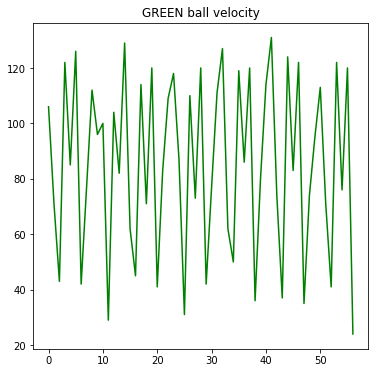

In [15]:
plt.title("GREEN ball velocity")
plt.plot(vppsGreen,color='GREEN')

# Blue Ball Track and speed

In [16]:
cap = cv2.VideoCapture('P4_juggling.mov')

#read first frame
ret, F0 = cap.read()

# thresholds for blue ball
lower_blue = np.array([100,60,110])
upper_blue = np.array([130,255,255])

#distance ball between frames  
eDistance=0

#kernel
kernel = np.ones((5,5), np.uint8)

# initiating coordinates
X_blue_old, Y_blue_old = 0, 0

countForCalculateVelocity = 0
              
while True:
    
    #read second frame
    ret ,F1 = cap.read()
    
    countForCalculateVelocity += 1
  
    if ret == True:
        F1 = cv2.resize(F1, (640, 360)) 
        
        # filter frame with sigma = 5
        blur = cv2.GaussianBlur(F1 ,(0,0),5)
        
        #Create Masking
        hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)    
        mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
       
        #list of contours
        contours_blue, _ = cv2.findContours(mask_blue, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
        
        #make sure that theres only one contour
        if len(contours_blue) == 1:
            mask_blue = cv2.dilate(mask_blue, kernel, iterations = 1)
        elif len(contours_blue) > 1:
            mask_blue = cv2.erode(mask_blue, kernel, iterations = 2)      
        
        # find center and append to list for velocity
        if(centerCalc(contours_blue[0])!=None):
            X_blue, Y_blue = centerCalc(contours_blue[0])
            listCenterBlue.append(contours_blue[0])

        cv2.circle(F1, (X_blue, Y_blue), 1, (0, 0, 0), 2)  # Center       
        cv2.circle(F1, (X_blue, Y_blue), 11, (200, 255,255), 2) #  Ball Perimeter  
        
        #difference between two concecutive frames (Position)
        if (X_blue_old and Y_blue_old)!=0:
            eDistance = math.dist([X_blue ,Y_blue], [X_blue_old, Y_blue_old])
        
        
        #difference between two concecutive frames (time)
        timebetweenframes= 1/sizeVideo             
        velocity = eDistance/timebetweenframes
        
        # counter when its over the frame 3, and append velocity
        if countForCalculateVelocity > 3:
            blueListDist.append(velocity)
        
        # save x,y 
        X_blue_old, Y_blue_old = X_blue, Y_blue
                 
        #prev frame -> next frame
        F0 = F1
        
        # print the velocity and trunck the velocity
        cv2.putText(F1, "{0}".format(math.trunc(velocity)), (X_blue - 20, Y_blue - 20),
          cv2.FONT_ITALIC, 0.5, (255, 255, 255), 2)
       
        # display frame in a window
        cv2.imshow('Blue ball Track and speed',F1)
        
        k = cv2.waitKey(1) & 0xff
        if k == 27:
            break
    else:
        break


cap.release() # release input video
cv2.destroyAllWindows() # delete output window
cv2.waitKey(1);

# Velocity blue ball PPS - pixel per second

In [17]:
#average velocity pixel per second
vppsBlue = [sum(blueListDist[i:i+sizeVideo])//sizeVideo for i in range(0,len(blueListDist),sizeVideo)]

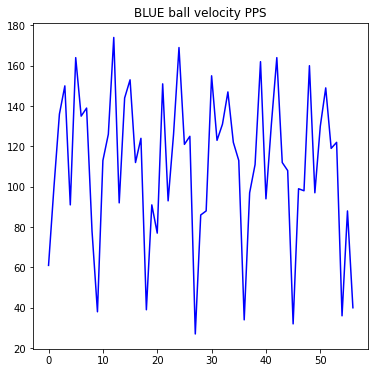

In [18]:
plt.title("BLUE ball velocity PPS")
plt.plot(vppsBlue,color='BLUE')

# Red Ball 
#### track bar and speed and sign limit of the lady, when the center of the ball across the line so its "rejection"


In [19]:
cap = cv2.VideoCapture('P4_juggling.mov')
H = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

#read first frame
ret, F0 = cap.read()

# thresholds for red ball
lower_red = np.array([1,100,184])
upper_red = np.array([5,180,250])

#distance ball between frames 
eDistance=0

lineX1 = 250
lineX2 = 420
flag = False

#Exseption from limit 
counterExseptionFromLimit  = 0

kernel = np.ones((5,5), np.uint8)

# initiating coordinates
X_red_old, Y_red_old = 0, 0


countForCalculateVelocity = 0
              
while True:
    
    #read second frame
    ret ,F1 = cap.read()
    
    countForCalculateVelocity += 1
    if ret == True:
        F1 = cv2.resize(F1, (640, 360))
        
        # filter frame with sigma = 5
        blur = cv2.GaussianBlur(F1 ,(0,0),5)
        
        #Create Masking
        hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)    
        mask_red = cv2.inRange(hsv, lower_red, upper_red)

        overlay = F1.copy()
        output = F1.copy()
                
        cv2.rectangle(F1, (lineX1, 0), (lineX1, H), (0, 255, 0), 2)  
        cv2.rectangle(F1, (lineX2, 0), (lineX2, H), (0, 255, 0), 2 ) 
        
        #list of contours
        contours_red, _ = cv2.findContours(mask_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
        
        #make sure that theres only one contour
        if len(contours_red)==1 :
            mask_red = cv2.dilate(mask_red, kernel, iterations=1)
        elif len(contours_red)>1:
            mask_red = cv2.erode(mask_red, kernel, iterations=2)
        
        # find center and append to list for velocity
        if(centerCalc(contours_red[0])!=None):
            X_red, Y_red = centerCalc(contours_red[0])
            listCenterRed.append(contours_red[0])
                     
        #difference between two concecutive frames (Position)
        if (X_red_old and Y_red_old) != 0:
            eDistance = math.dist([X_red,Y_red], [X_red_old,Y_red_old])
          
        #difference between two concecutive frames (time)
        timebetweenframes = 1/sizeVideo
        velocity = eDistance/timebetweenframes
        
        # counter when its over the frame 3, and append velocity
        if countForCalculateVelocity > 3:
            redListDist.append(velocity)
        
          # save x,y 
        X_red_old = X_red
        Y_red_old = Y_red
         
        #prev frame -> next frame
        F0 = F1
        
        #sign line for test and counter
        if lineX1 > X_red:     
            cv2.line(output, (lineX1, 0), (lineX1, H), (0, 0, 255), 3 )
            if flag == False:
                flag = True
                counterExseptionFromLimit += 1 
        elif lineX2 < X_red: 
            cv2.line(output, (lineX2, 0), (lineX2, H), (0, 0, 255), 3 )
            if flag == False:
                flag = True
                counterExseptionFromLimit += 1 
        else:
            flag = False
        
        cv2.rectangle(F1, (X_red + 20, Y_red - 15), (X_red + 15 + 40, Y_red - 15 -7), (0,0,0), 12)       
        cv2.addWeighted(F1,  0.3, output, 1 - 0.3,0, output)
        cv2.putText(output, "{0} ".format(math.trunc(velocity)), (X_red + 15, Y_red - 15),
          cv2.FONT_ITALIC, 0.5, (255, 255, 255), 2)
        cv2.circle(output, (X_red, Y_red), 11, (200, 255, 255), 2)
        cv2.putText(output, "Counter: {0}".format(math.trunc(counterExseptionFromLimit)), ( 10, 75),
          cv2.FONT_ITALIC, 0.5, (255, 255, 255), 2)
        
        cv2.imshow('Red ball velocity and counter exseption from limit',output) # display frame in a window
    
        k = cv2.waitKey(1) & 0xff
        if k == 27:
            break
    else:
        break

cap.release() # release input video
cv2.destroyAllWindows() # delete output window
cv2.waitKey(1);

# Velocity red ball PPS - pixel per second

In [20]:
#average velocity pixel per second
vppsRed = [sum(redListDist[i:i+ sizeVideo])//sizeVideo for i in range(0, len(redListDist), sizeVideo)]

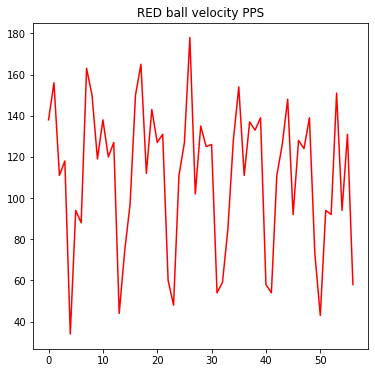

In [21]:
plt.title("RED ball velocity PPS")
plt.plot(vppsRed,color='RED')

### Third Velocity of the balls pixel per second

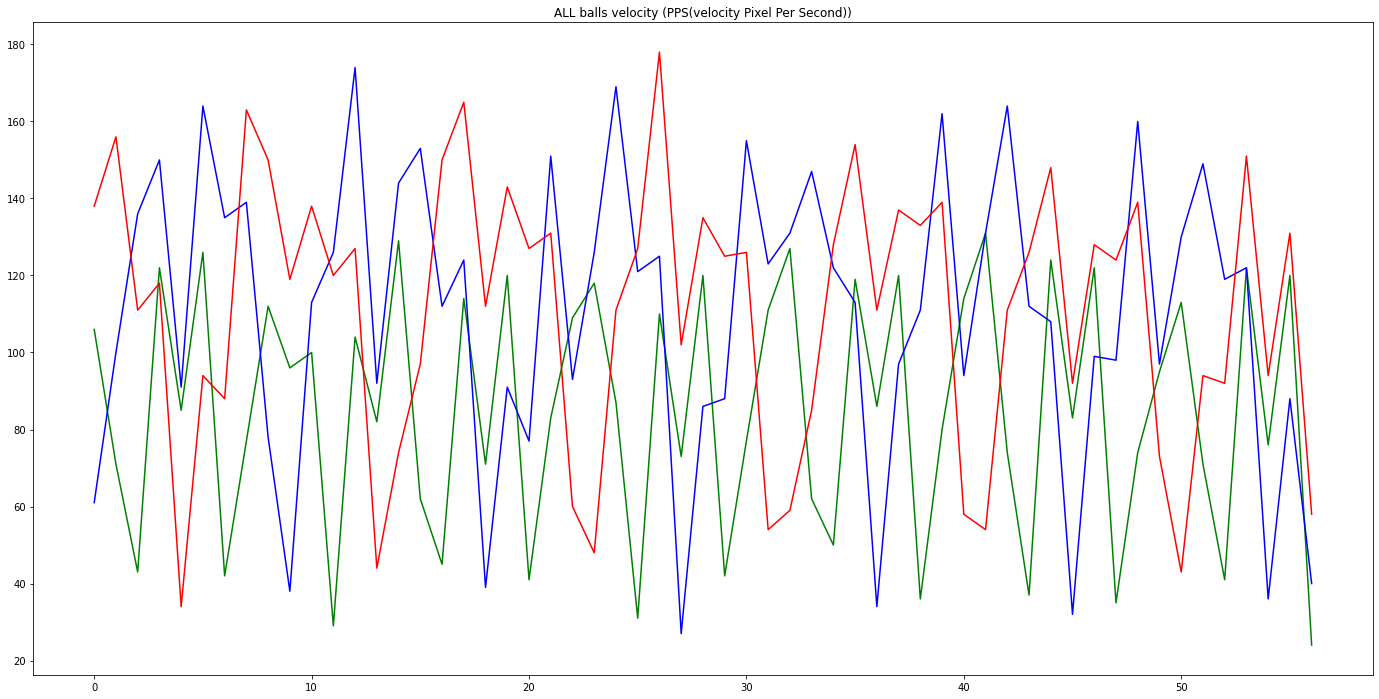

In [22]:
plt.figure(figsize=[24,12])

plt.title("ALL balls velocity (PPS(velocity Pixel Per Second))")
plt.plot(vppsGreen,label="Green",color='GREEN')
plt.plot(vppsBlue,label="Blue",color='BLUE')
plt.plot(vppsRed,label="Red",color='RED')
plt.show()


# Final Solution

##### in this section we merged all the singular results from previous stages into one video, we also added a trackbar for thickness of the circles around the balls as well as red lines between each 2 balls to mark the distance of every ball to the other. we added 2 vertical lines on the sides of the lady for the purpose of identifying the number of times of which any ball got out of boundries (the two green lines).

In [23]:
cap = cv2.VideoCapture('P4_juggling.mov')

#details for save the video
W = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
H = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
fourcc = cv2.VideoWriter_fourcc(*'.mov') # or just copy it from the original video
out = cv2.VideoWriter('Final_Juggling_Lady.mov',fourcc, fps, (W,H)) # (W,H) should be integers

#difference between two concecutive frames (time)
timebetweenframes = 1/sizeVideo  

#read first frame
ret, F0 = cap.read()

# thresholds for each ball
lower_green = np.array([40,100,100])
upper_green = np.array([60,255,255])

lower_blue = np.array([100,60,110])
upper_blue = np.array([130,255,255])

lower_red = np.array([1,100,184])
upper_red = np.array([5,180,250])

# initiating coordinates
X_green_old, X_blue_old, X_red_old = 0, 0, 0
Y_green_old, Y_blue_old, Y_red_old = 0 ,0, 0
 
# create limit in X 
lineX1 = 250
lineX2 = 420

# counter for over balls from limit
counterExseptionFromLimit = 0

# sign the ball over the limit
flag = False

cv2.namedWindow('final')

cv2.createTrackbar('Thickness','final',2,10,(lambda a: None))
              
while True:
    
    #read second frame
    ret ,F1 = cap.read()
    
    if ret == True:
        
        F1 = cv2.resize(F1, (640, 360)) 
           
        # filter frame with sigma = 5
        blur = cv2.GaussianBlur(F1 ,(0,0),5)
           
        # #Create Masking
        hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)   
        mask_green = cv2.inRange(hsv, lower_green, upper_green)
        mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
        mask_red = cv2.inRange(hsv, lower_red, upper_red)
        
        # limit of the lady juggling
        cv2.rectangle(F1, (lineX1, 0), (lineX1, H), (0, 255, 0), 2)  
        cv2.rectangle(F1, (lineX2, 0), (lineX2, H), (0, 255, 0), 2 )   
        
        output = F1.copy()
        
        #list of contours
        contours_green, _ = cv2.findContours(mask_green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
        contours_blue, _ = cv2.findContours(mask_blue, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
        contours_red, _ = cv2.findContours(mask_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
        
        # make sure that theres only one contour
        oneCtorVarifier(contours_green, mask_green)
        oneCtorVarifier(contours_blue, mask_blue)
        oneCtorVarifier(contours_red, mask_red)
        
        # find center of each ball at every iteration
        if(centerCalc(contours_green[0])!=None):
            X_green, Y_green = centerCalc(contours_green[0])   
    
        if(centerCalc(contours_blue[0])!=None):
            X_blue, Y_blue = centerCalc(contours_blue[0])
            
        if(centerCalc(contours_red[0])!=None):
            X_red, Y_red = centerCalc(contours_red[0])
                
        #difference between two concecutive frames (Position)
        eDistance_green = eucledeanDistance(X_green_old, Y_green_old, X_green, Y_green)
        eDistance_blue = eucledeanDistance(X_blue_old, Y_blue_old, X_blue, Y_blue)
        eDistance_red = eucledeanDistance(X_red_old, Y_red_old, X_red, Y_red)
        
        #distance between balls
        dist_red2blue = eucledeanDistance(X_blue, Y_blue, X_red, Y_red)
        dist_red2green = eucledeanDistance(X_green, Y_green, X_red, Y_red)
        dist_green2blue = eucledeanDistance(X_blue, Y_blue, X_green, Y_green)
        
        # v = dx/dt, difference between two concecutive frames (time)
        velocity_green = eDistance_green/timebetweenframes
        velocity_blue = eDistance_blue/timebetweenframes
        velocity_red = eDistance_red/timebetweenframes
        
        # each iteration the current coordinates will become the old ones inorder to determine position difference from frame to frame
        X_green_old, Y_green_old = X_green, Y_green 
        X_blue_old, Y_blue_old = X_blue, Y_blue  
        X_red_old, Y_red_old = X_red, Y_red 
                       
        thickness = cv2.getTrackbarPos('Thickness','final')
        
        # Drawing a faded box that conatains the speed of each ball
        cv2.rectangle(F1, (X_green + 15, Y_green - 15), (X_green + 85, Y_green - 22), (0,0,0), 12)
        cv2.rectangle(F1, (X_red + 15, Y_red - 15), (X_red + 85, Y_red - 22), (0,0,0), 12)
        cv2.rectangle(F1, (X_blue + 15, Y_blue - 15), (X_blue + 85, Y_blue - 22), (0,0,0), 12)
        
        cv2.addWeighted(F1,  0.3, output, 1 - 0.3, 0, output)
        
         #sign line for test and counter
        if lineX1 > X_green or lineX1 > X_blue or lineX1 > X_red:     
            cv2.line(output, (lineX1, 0), (lineX1, H), (0, 0, 255), 3 )
            if flag == False:
                flag = True
                counterExseptionFromLimit += 1
        elif lineX2 < X_green or lineX2 < X_blue or lineX2 < X_red: 
            cv2.line(output, (lineX2, 0), (lineX2, H), (0, 0, 255), 3 )
            if flag == False:
                flag = True
                counterExseptionFromLimit += 1
        else:
            flag = False
              
         #drawing the speed of every ball in each frame (pixels per second)
        cv2.putText(output, "{0} PPS".format(math.trunc(velocity_green)), (X_green + 15, Y_green - 15),
          cv2.FONT_ITALIC, 0.5, (255, 255, 255), 2)
        
        cv2.putText(output, "{0} PPS".format(math.trunc(velocity_blue)), (X_blue + 15, Y_blue - 15),
          cv2.FONT_ITALIC, 0.5, (255, 255, 255), 2)     
        
        cv2.putText(output, "{0} PPS".format(math.trunc(velocity_red)), (X_red + 15, Y_red - 15),
          cv2.FONT_ITALIC, 0.5, (255, 255, 255), 2)
        
        # draw line between balls
        cv2.line(output, (X_green,Y_green), (X_red, Y_red), (0,0,255), 2)
        cv2.line(output, (X_blue, Y_blue), (X_red, Y_red), (0,0,255), 2)
        cv2.line(output, (X_blue, Y_blue), (X_green,Y_green), (0,0,255), 2)
        
        #draw the distance between balls
        cv2.putText(output, "Distance Green to Blue: {0}".format(math.trunc(dist_green2blue)), ( 10, 15),
          cv2.FONT_ITALIC, 0.5, (255, 255, 255), 2)
        cv2.putText(output, "Distance Red to Blue: {0}".format(math.trunc(dist_red2blue)), ( 10, 35),
          cv2.FONT_ITALIC, 0.5, (255, 255, 255), 2)
        cv2.putText(output, "Distance Green to Red: {0}".format(math.trunc(dist_red2green)), ( 10, 55),
          cv2.FONT_ITALIC, 0.5, (255, 255, 255), 2)
        cv2.putText(output, "Counter: {0}".format(math.trunc(counterExseptionFromLimit)), ( 10, 75),
          cv2.FONT_ITALIC, 0.5, (255, 255, 255), 2)
        cv2.putText(output, "PPS: Pixel Per Second", ( 10, 95),
          cv2.FONT_ITALIC, 0.5, (255, 255, 255), 2)
        
        cv2.circle(output, (X_green, Y_green), 10, (230, 255, 255), thickness)#   green ball Perimeter     
        cv2.circle(output, (X_blue, Y_blue), 10, (230, 255,255), thickness) #   blue Ball Perimeter           
        cv2.circle(output, (X_red, Y_red),  10, (230, 255, 255), thickness)#   red ball Perimeter             
            
        cv2.imshow('final', output) # display frame in a window
        out.write(output)
        
        k = cv2.waitKey(1) & 0xff
        if k == 27:
            break
    else:
        break

cap.release() # release input video
out.release() # release out video
cv2.destroyAllWindows() # delete output window
cv2.waitKey(1);